# Data Viz Notes and a HMS Style Guide for Plots

[Andrew Wheeler, Phd](mailto:andrew.wheeler@hms.com)

I've made a nice template to follow [HMS style guides](https://buzz.hms.com/sites/marcom/Guides/HMS-Style-Guide.pdf), plus some things I personally think make the default charts in Python nicer (bigger labels, light grid background, etc.) 

Here is a walkthrough, plus my notes for making nice graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#######
#importing the functions and objects to change the plot style
import os
my_dir = r'C:\Users\e009156\Documents\DataScience_Notes\DataViz_Notes'
os.chdir(my_dir)
from hms_plotstyle import *
#######
#You can grab the current hms_plotstyle.py from GitHub at https://github.com/hmsholdings/data-science-utils/tree/master/DataViz

#To simply set the default HMS Style just run
#hms_plots()

First I am going to run a default graph, then change the style so you can see the difference. 

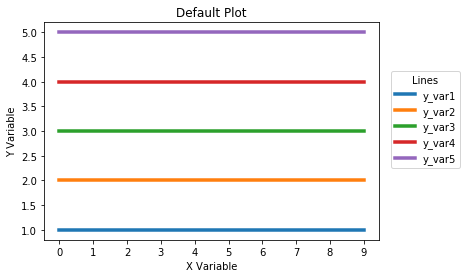

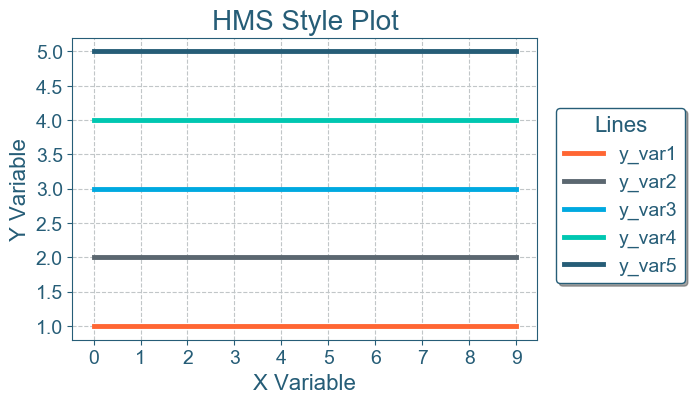

In [2]:
#######################################################
#Some simple data
n = 10
x = list(range(n))
y1 = [1]*n
y2 = [2]*n
y3 = [3]*n
y4 = [4]*n
y5 = [5]*n
my_vars = ['x','y_var1','y_var2','y_var3','y_var4','y_var5']

my_dat = pd.DataFrame(zip(x,y1,y2,y3,y4,y5), columns=my_vars)
######################################################


#######################################################
#Making a nice line graph (wide format)

def my_lines(title):
    fig, ax = plt.subplots() #can also use figsize=(x,y) here to set size in inches
    for i in my_vars[1:6]:
        ax.plot('x',i, label=i, linewidth=3.5, data=my_dat)
        #To superimpose points, ### marker='o', mec='white', ms=10 ###
    plt.yticks(np.arange(1,5.5,0.5)) #example making regular grids
    plt.xticks(range(n))
    ax.set_xlabel('X Variable')
    ax.set_ylabel('Y Variable')
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.02, 0.8), title="Lines") #to the right
    #plt.savefig('Example_LinePlot.png', dpi=2000, bbox_inches='tight')
    plt.show()

#Default looking plot
my_lines(title='Default Plot')

#Setting the style, changes globals associated with matplotlib.rcParams
hms_plots() 

my_lines(title='HMS Style Plot')

Note that this changes some globals, but we can revert to the matplotlib defaults by running `hms_plots(False)`. You get a few objects of interest, a dictionary of HMS colors, as well as a style sheet dictionary.

In [3]:
print("hms_colors")
print( hms_colors )

print("")
print("rcParams set by hms_style")
for i in hms_style.items():
    print(i) 

hms_colors
{'Orange': '#ff6633', 'DarkGrey': '#5b6770', 'LightBlue': '#00a9e0', 'Teal': '#00c7b1', 'DarkBlue': '#265d77', 'LightGrey': '#c1c6c8'}

rcParams set by hms_style
('font.sans-serif', 'Arial')
('font.family', 'sans-serif')
('axes.grid', True)
('grid.linestyle', '--')
('grid.color', '#c1c6c8')
('legend.framealpha', 1)
('legend.facecolor', 'white')
('legend.shadow', True)
('legend.fontsize', 14)
('legend.title_fontsize', 16)
('xtick.labelsize', 14)
('ytick.labelsize', 14)
('axes.labelsize', 16)
('axes.titlesize', 20)
('axes.axisbelow', True)
('figure.figsize', [6, 4])
('figure.dpi', 100)
('text.color', '#265d77')
('axes.labelcolor', '#265d77')
('axes.edgecolor', '#265d77')
('xtick.color', '#265d77')
('ytick.color', '#265d77')
('legend.edgecolor', '#265d77')
('axes.prop_cycle', cycler('color', ['#ff6633', '#5b6770', '#00a9e0', '#00c7b1', '#265d77', '#c1c6c8']))


If you want to change some of the styles, you can make either update `hms_style` directly or make a copy. Also gives an example of adding in another color (purple). (Here I add it to the front of the cycle, but you probably want to add it to the back if you need to use more colors.)

Some of these options I've included are actually the default (e.g. `'figure.figsize': [6,4]`), so it is a simpler list to change things.

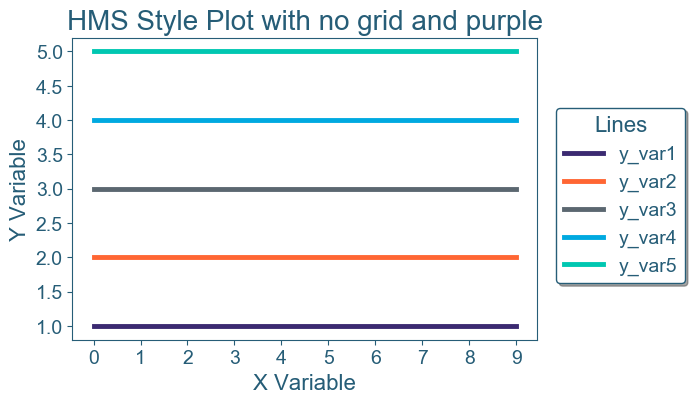

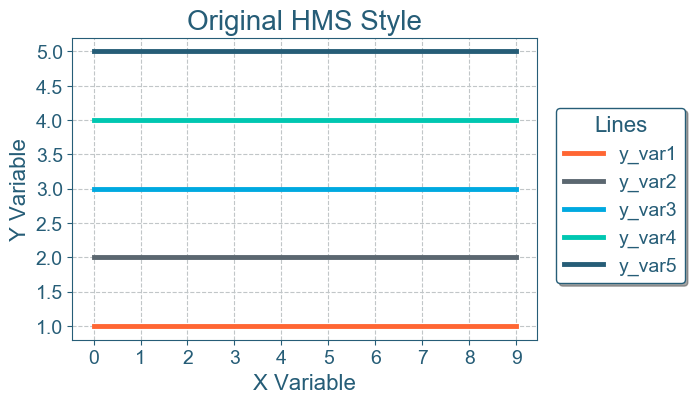

In [4]:
#Example changing the stylesheet so it does not draw grids and has extra color purple
col_list = list( hms_colors.values() )
new_cycle = cycler(color = ['#3b2a71'] + col_list) #adds it at the front
new_dict = {'axes.grid': False,
            'axes.prop_cycle': new_cycle}

hms_plots(style=True, up_dict = new_dict)
my_lines(title='HMS Style Plot with no grid and purple')

#Setting it back to the original grid
hms_plots()
my_lines(title='Original HMS Style')

In the original line plot you can see some examples of how I made it "prettier". Set the X and Y axis titles, and explicity set where the ticks occur. And place the legend outside of the graph. (I have an example of placing the legend below as well.) 

Here is an example of making a scatterplot with the same data. 

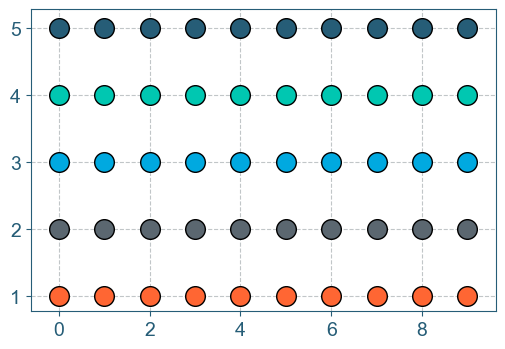

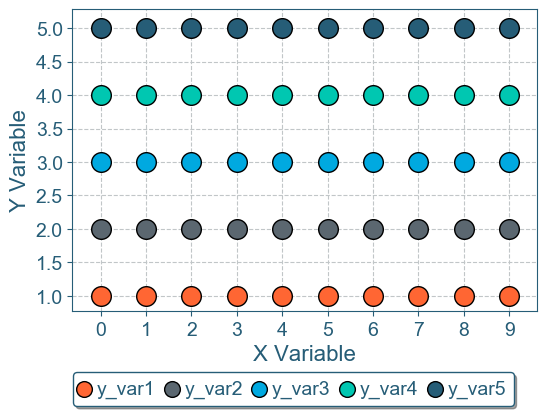

In [5]:
#Plot default without the extras
fig, ax = plt.subplots()
for i in my_vars[1:6]:
    ax.scatter('x', i, s=200, data=my_dat, alpha=1, edgecolors='black', label=i)   
plt.show()

#Now adding in some nice extras
fig, ax = plt.subplots()
for i in my_vars[1:6]:
    ax.scatter('x', i, s=200, data=my_dat, alpha=1, edgecolors='black', label=i)
plt.yticks(np.arange(1,5.5,0.5)) #example making regular grids
plt.xticks(range(n)) #can use range for simple integers
ax.set_xlabel('X Variable')
ax.set_ylabel('Y Variable')
#legend below graph example
ax.legend(markerscale=0.8,handletextpad=0.5,handlelength=0.3, bbox_to_anchor=(0.97, -0.17), ncol=5, columnspacing=0.7)
plt.show()

Here is an example of making a bar graph. The first is a typical bar graph, whereas the second is a minimalist version I've seen folks use to eliminate grid lines. I prefer the first actually, but it is just an example of how you can change all sorts of options either upfront in the `hms_style` dictionary, or post-hoc in all of the crazy matplotlib options.

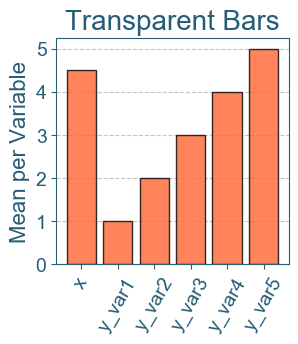

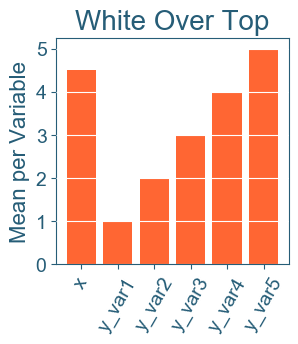

In [6]:
mns = my_dat.aggregate('mean') #aggregating the means per variable

#Bar plot, using transparency to see the Y grid lines underneath the bars
fig, ax = plt.subplots(figsize=(3,3)) #changing the size to be smaller
plt.bar(x=mns.index, height=mns, edgecolor='black', alpha=0.8)
plt.xticks(rotation=60)
plt.yticks(np.arange(0,5.5,1))
ax.set_ylabel('Mean per Variable')
ax.set_title("Transparent Bars")
ax.grid(False, axis='x')
plt.show()

#This is for block style grid lines overtop
fig, ax = plt.subplots(figsize=(3,3)) 
plt.bar(x=mns.index, height=mns)
plt.xticks(rotation=60)
plt.yticks(np.arange(0,5.5,1))
ax.set_ylabel('Mean per Variable')
ax.set_title("White Over Top")
ax.grid(False, axis='x')
ax.grid(True, linestyle='-',color='white', axis='y')
ax.set_axisbelow(False)
plt.show()

If you want to export a figure to insert into a powerpoint presentation, I suggest exporting as a high resolution PNG file. It is generally more difficult to work with vector formats (emf/svg) in powerpoints (and conversion to emf doesn't work very well in many circumstances). PDF works well, but is not convenient to insert into a powerpoint or other document.

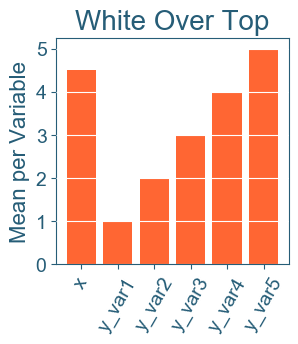

In [7]:
#This is for block style grid lines overtop
fig, ax = plt.subplots(figsize=(3,3)) 
plt.bar(x=mns.index, height=mns)
plt.xticks(rotation=60)
plt.yticks(np.arange(0,5.5,1))
ax.set_ylabel('Mean per Variable')
ax.set_title("White Over Top")
ax.grid(False, axis='x')
ax.grid(True, linestyle='-',color='white', axis='y')
ax.set_axisbelow(False)
#Need to export BEFORE showing it
my_loc = r'C:\Users\e009156\Documents\DataScience_Notes\DataViz_Notes'
my_png = my_loc + r'\Example_LinePlot.png'
my_pdf = my_loc + r'\Example_LinePlot.pdf'
plt.savefig(my_png, dpi=1000, bbox_inches='tight')
plt.savefig(my_pdf, dpi=1000, bbox_inches='tight') #PDF axis lines are not in right zorder, white on top
plt.show()

*Experimental Decorator HMS Style function*

I have also added in a decorator function, `@style_wrap`, that allows you to locally define the hms style for a plotting function, and afterwords it reverts back to the whatever the prior matplotlib style sheet state was. I think it makes more sense to use the `hms_plots()` function once at the beginning of a script and be done with it than use this decorator, but here it is. (Also not sure how to have it accept arguments to change the default.)

Here I made an example ROC curve generator plot. You pass in multiple predictions and the true labels, and it generates a nice plot superimposing all the curves. I show how it doesn't change the default global state by showing the `my_lines` example both before and after.

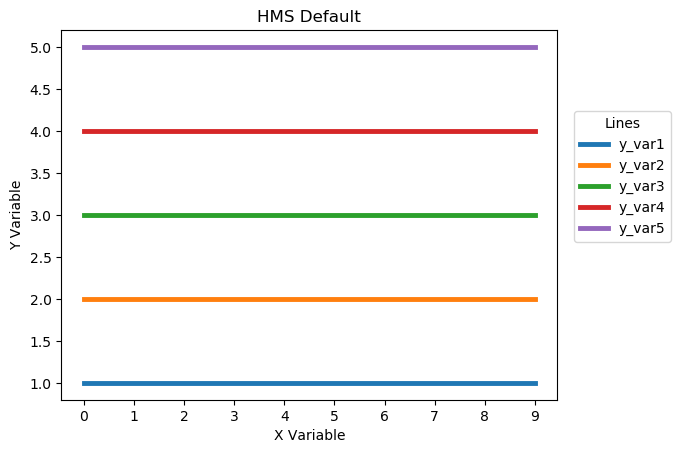

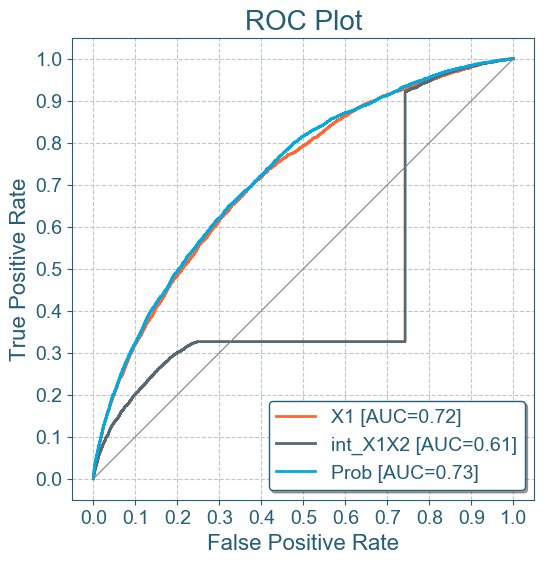

C:\Users\e009156\AppData\Local\Continuum\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\e009156\AppData\Local\Continuum\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\e009156\AppData\Local\Continuum\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\e009156\AppData\Local\Continuum\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\e009156\App

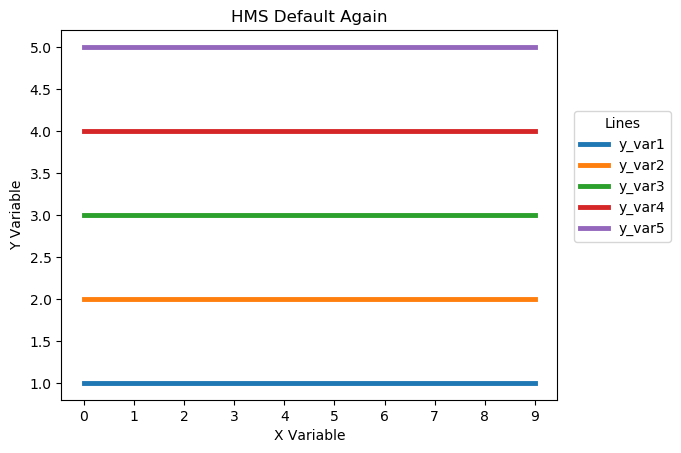

In [8]:
#Changing the global state to the default matplotlib style
hms_plots(style=False)

my_lines(title='HMS Default') #Showing how the graph is default (this should be smaller?)

#Making a HMS style wrapped ROC function
from sklearn import metrics

@style_wrap
def roc_plot(data,true,pred):
    #setting up the plot
    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    #calculating the curve for each line
    for p in pred:
        fpr, tpr, thresh = metrics.roc_curve(data[true], data[p], pos_label=1)
        p_auc = round(metrics.auc(fpr, tpr),2)
        p_lab = p + " [AUC=" + str(p_auc) + "]"
        ax.plot(fpr, tpr, drawstyle='steps-post', label=p_lab, linewidth=2)
    #maybe should order these by the max auc?
    #mid-reference line
    ax.plot([0,1], [0,1], color='grey', linewidth=0.8)
    ax.set_title("ROC Plot")
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    ax.legend(loc='lower right') #hopefully nothing here!
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_aspect(aspect='equal')
    plt.show()

#Simulate data to illustrate ROC plot
np.random.seed(10)
tot_n = 100000
sim_dat = pd.DataFrame({'Id': range(tot_n)})
sim_dat['X1'] = np.random.randn(tot_n)
sim_dat['X2'] = np.random.binomial(1,0.5,size=tot_n)
sim_dat['int_X1X2'] = sim_dat['X1']*sim_dat['X2']
sim_dat['Logit'] = -3.5 + 0.8*sim_dat['X1'] - 0.5*sim_dat['X2'] + 0.1*sim_dat['int_X1X2']
sim_dat['Prob'] = 1/(1 + np.exp(-sim_dat['Logit']))
sim_dat['Y'] = np.random.binomial(1,sim_dat['Prob'])

#Now showing our hms style plot
roc_plot(data=sim_dat, true='Y', pred=['X1','int_X1X2','Prob'])  

#See back to default
my_lines(title='HMS Default Again')

# Working with Seaborn

For things like stacked/clustered bar plots, I would use the seaborn library (alread imported above as `import seaborn as sns`). Seaborn is also nice for kernel density plots, and small multiple plots. It uses matplotlib as the backend, so most of the formatting I've applied above still works just fine and dandy by default. Here is a nice display of the cycle colors used in a violin plot. 

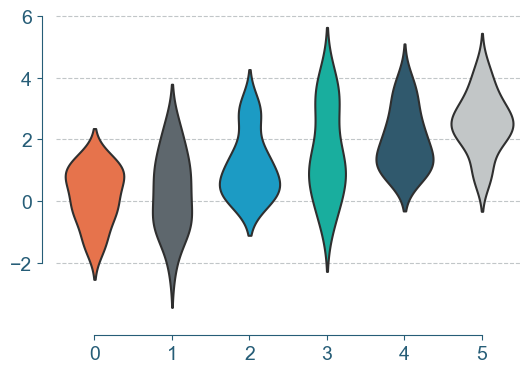

In [9]:
#again setting it back to the global hms style 
hms_plots()

#VIOLINPLOT
gr = 6
data = np.random.normal(size=(20, gr)) + np.arange(gr) / 2
sns.violinplot(data=data, inner=None) 
sns.despine(offset=10, trim=True) #makes the xes only go for as long as the observed data
#can do color=hms_colors['Orange'] in violinplot call
#no real need for different colors here, but looks nice
#to show off the palette

Instead of looping through different variables and superimposing them on a plot, seaborn lets you plot the data in long format, and pass a parameter to say whether to group points in a particular way (e.g. color them differently). Here is an example default scatterplot by a grouping variable, and then I show how to make it nicer looking. 

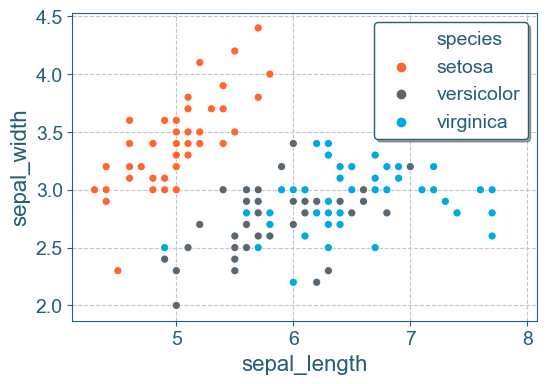

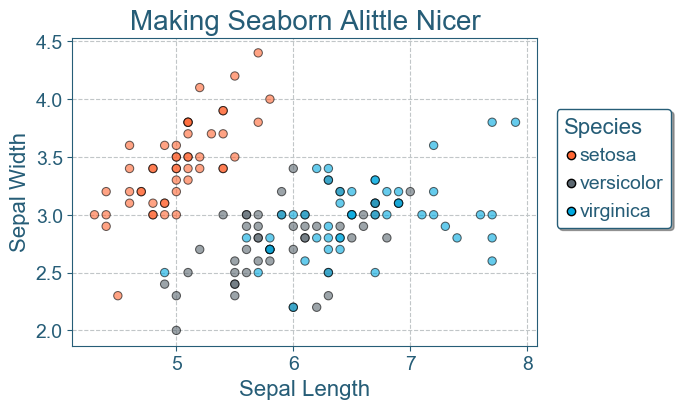

In [10]:
#SCATTERPLOT 
iris = sns.load_dataset("iris")

#Default seaborn scatterplot
ax = sns.scatterplot(x='sepal_length', y='sepal_width',hue='species',
                     data=iris)
plt.show()
#should maybe jitter points as they are binned

#Making the legend and everything nicer, same way as you do to
#original matplotlib code
ax = sns.scatterplot(x='sepal_length',y='sepal_width',hue='species', 
                     data=iris, edgecolor='black',alpha=0.6) #transparency shows overplotting
ax.set_title("Making Seaborn Alittle Nicer")
ax.set_ylabel('Sepal Width')
ax.set_xlabel('Sepal Length')
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(title='Species', handletextpad=0.1, handlelength=0.7, 
          bbox_to_anchor=(1.02, 0.8), handles=handles[1:], labels=labels[1:])
for i in legend.legendHandles:
    i.set_edgecolor('black') #can also do set_text('???') here
legend._legend_box.align='left'
plt.show()

Seaborn is really nice though for making small multiple plots by groups.

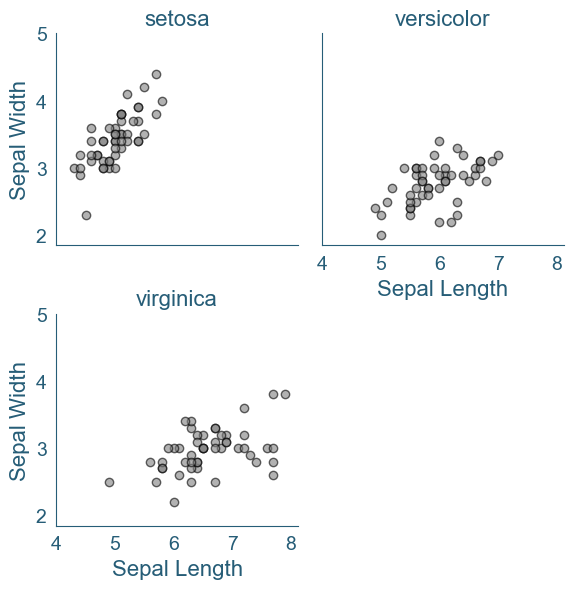

In [11]:
#SMALL MULTIPLE SCATTERPLOT

#can supply your own style dictionary to sns plots
hms_nogrid = hms_style.copy()
hms_nogrid['axes.grid'] = False

with sns.axes_style("white", rc=hms_nogrid): #using my nogrid from earlier 
    g = sns.FacetGrid(data=iris, col='species', col_wrap=2)
g.map(plt.scatter,'sepal_length','sepal_width', alpha=0.6, color='grey', edgecolor='k') 
#order of args matters, need kwargs after alpha
g.set_axis_labels("Sepal Length", "Sepal Width")
g.set_titles("{col_name}")
g.set(xticks=[4,5,6,7,8], yticks=[2, 3, 4, 5])
g.fig.subplots_adjust(wspace=.1) #hspace=.02 

And here are a few extra type plots that are pretty nice. Swarmplot (good alternative to violin/boxplot for small n data), scatterplot matrix, 1d kernel density, and 2d kernel density.

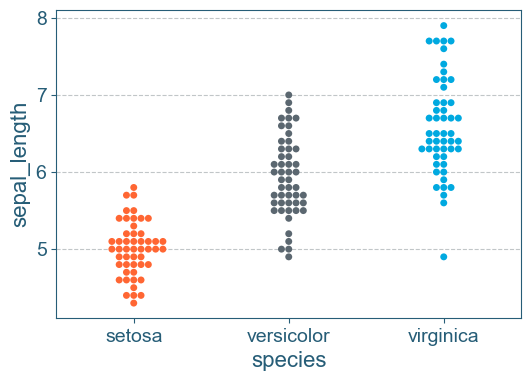

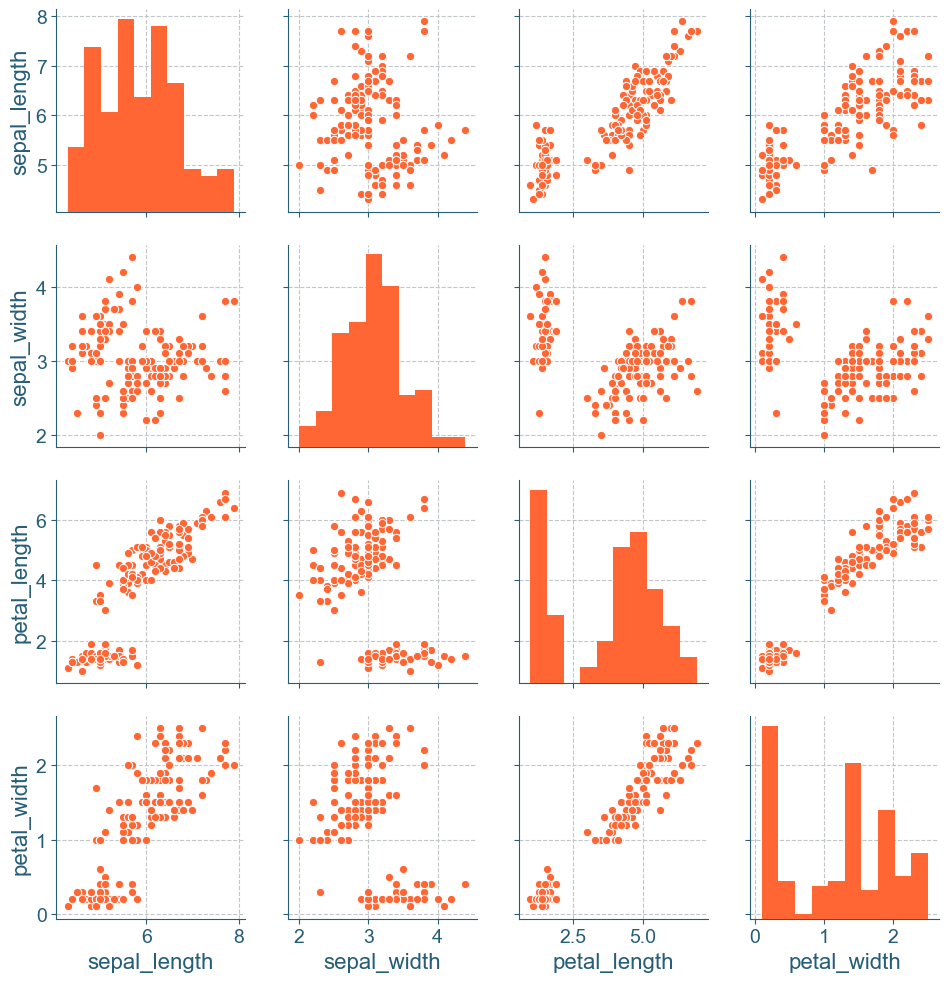

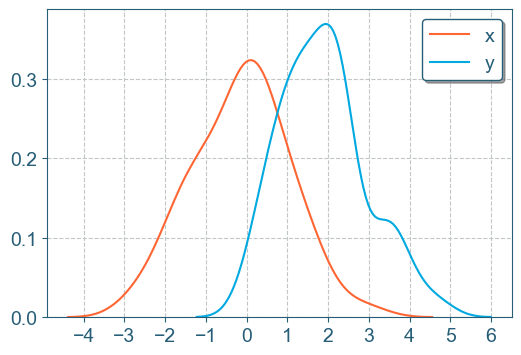

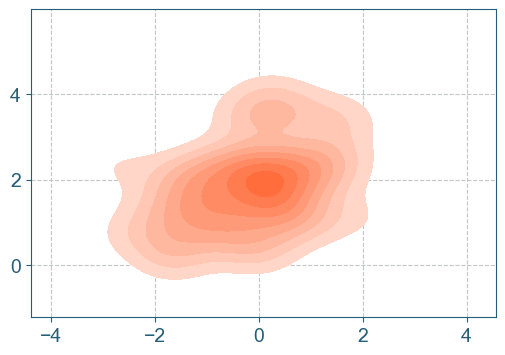

In [12]:
#Swarm plot
ax = sns.swarmplot(x='species', y='sepal_length', data=iris)
plt.show()

#Scatterplot matrix (how to get bar outlines back to white?)
sns.pairplot(iris)
plt.show()

#Superimposing 1d kernel density plots
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, shade=False, label='x')
ax = sns.kdeplot(y, shade=False, label='y', color=hms_colors['LightBlue']) 
plt.xticks(np.arange(-4,6.5,1))
plt.show()
#You need to do this in wide format apparently

#2d kernel density plot
ax = sns.kdeplot(x, y, shade=True, shade_lowest=False) #cmap="Purples_d"
plt.show()